Analyze the job skills required for a given job posting


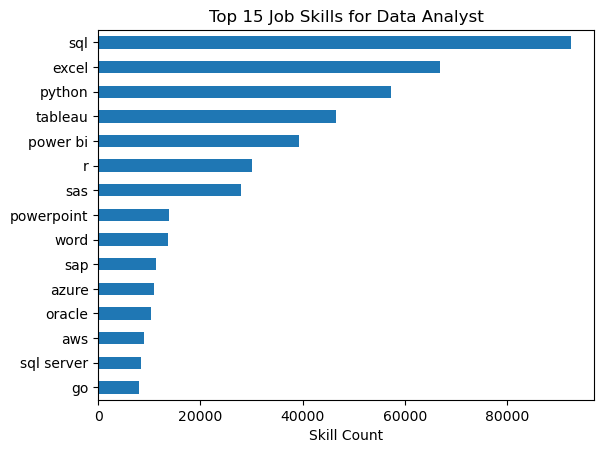

In [2]:
# compiled code for 11_Pandas_Explode with input parameters

import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

print("Analyze the job skills required for a given job posting")
job_title = input("Enter the job title to analyze: ")
top_skills = int(input("How many top skills are required to analyze?: "))

df_exploded = df.explode('job_skills')
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending = False)

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skill_final = df_skill_final.sort_values(by='skill_count', ascending=False)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills} Job Skills for {job_title}")
plt.xlabel("Job Posting Count")
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()